In [2]:
!pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ------------ --------------------------- 0.5/1.6 MB 670.4 kB/s eta 0:00:02
   ------------------- -------------------- 0.8/1.6 MB 882.6 kB/s eta 0:00:01
   ------------------------- -------------- 1.0/1.6 MB 931.8 kB/s eta 0:00:01
   -------------------------------- ------- 1.3/1.6 MB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 1.6/1.6 MB 994.4 kB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15617 sha256=8d0412ea9f762322a5de306894bb89d4e583589f520ed311cf1215d1f47b3ca9
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\cc\bd

In [3]:
!pip install tensorflow

   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/331.9 MB ? eta -:--:--
   ---------------------------------------- 0.5/331.9 MB 882.6 kB/s eta 0:06:16
   ---------------------------------------- 0.8/331.9 MB 838.9 kB/s eta 0:06:35
   ---------------------------------------- 0.8/331.9 MB 838.9 kB/s eta 0:06:35
   ---------------------------------------- 1.3/331.9 MB 958.5 kB/s eta 0:05:45
   ---------------------------------------- 1.6/331.9 MB 1.0 MB/s eta 0:05:16
   ---------------------------------------- 1.8/331.9 MB 1.1 MB/s eta 0:04:56
   ---------------------------------------- 2.4/331.9 MB 1.3 MB/s eta 0:04:21
   ---------------------------------------- 2.6/331.9 MB 1.3 MB/s eta 0:04:18
   ---------------------------------------- 3.1/331.9 MB 1.4 MB/s eta 0:04:01
   ---

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.33.5 which is incompatible.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
stock = "AAPL"  # you can change (TCS.NS, INFY.NS etc)
df = yf.download(stock, start="2018-01-01", end="2024-12-31")
print(df.head())

[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2018-01-02  40.304173  40.313533  39.602254  39.812832  102223600
2018-01-03  40.297153  40.839972  40.233983  40.367346  118071600
2018-01-04  40.484325  40.587274  40.262052  40.369677   89738400
2018-01-05  40.945263  41.031832  40.489016  40.580266   94640000
2018-01-08  40.793186  41.087991  40.694914  40.793186   82271200


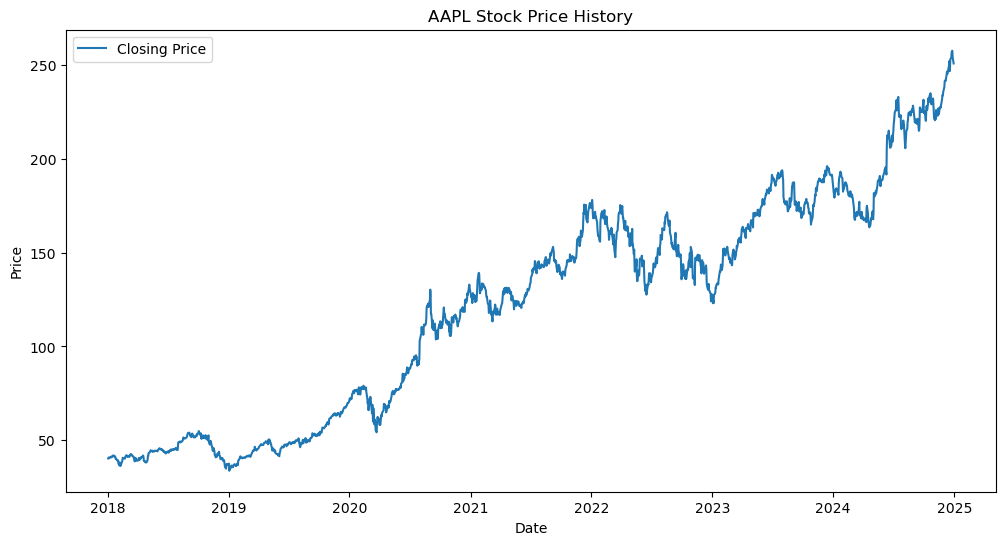

In [5]:
# Plot closing price
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price")
plt.title(f"{stock} Stock Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [6]:
data = df[['Close']]
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# create sequences
X = []
y = []

sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

In [7]:
# reshape for LSTM
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [8]:
# train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [9]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 13s 76ms/step - loss: 0.0100
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step - loss: 6.4198e-04
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 5.5875e-04
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 80ms/step - loss: 5.0497e-04
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - loss: 5.0597e-04
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - loss: 5.1817e-04
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 89ms/step - loss: 4.3633e-04
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 4.4907e-04
Epoch 9/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 4.0157e-04
Epoch 10/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 3.9397e-04


In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1,1))
actual = scaler.inverse_transform(y_test.reshape(-1,1))

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step


In [ ]:
plt.figure(figsize=(12,6))
plt.plot(actual, label="Actual Price")
plt.plot(predictions, label="Predicted Price")
plt.title("Actual vs Predicted Stock Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
last_60_days = scaled_data[-60:]
last_60_days = np.reshape(last_60_days, (1,60,1))
future_price = model.predict(last_60_days)
future_price = scaler.inverse_transform(future_price)
print("Predicted Next Day Price:", future_price[0][0])

In [ ]:
df1 = pd.read_csv("AAPL.csv")
# Convert date column
df1['Date'] = pd.to_datetime(df1['Date'])
df1 = df1.sort_values('Date')
print(df.head())

In [ ]:
# Create daily return
df1['Return'] = df1['Close'].pct_change()
# Moving averages
df1['MA5'] = df1['Close'].rolling(window=5).mean()
df1['MA10'] = df1['Close'].rolling(window=10).mean()
# Target variable
# 1 = Price Up, 0 = Price Down
df1['Target'] = np.where(df1['Close'].shift(-1) > df1['Close'], 1, 0)
df1.dropna(inplace=True)

In [ ]:
# Closing price over time
plt.figure(figsize=(12,5))
plt.plot(df1['Date'], df1['Close'])
plt.title("Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# Moving Averages
plt.figure(figsize=(12,5))
plt.plot(df1['Date'], df1['Close'], label='Close')
plt.plot(df1['Date'], df1['MA5'], label='MA5')
plt.plot(df1['Date'], df1['MA10'], label='MA10')
plt.legend()
plt.title("Moving Average Trend")
plt.show()

In [ ]:
# Return Distribution
plt.figure(figsize=(6,4))
sns.histplot(df1['Return'], bins=50, kde=True)
plt.title("Return Distribution")
plt.show()

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

In [ ]:
features = ['Open','High','Low','Close','Volume','MA5','MA10','Return']
X = df1[features]
y = df1['Target']
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

In [ ]:
# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf')
}

results = {}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)

    acc = (accuracy_score(y_test, pred))*100
    results[name] = acc

    print(f"\n{name} Accuracy:", acc)
    print(classification_report(y_test, pred))

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.savefig(f"cm_{name}.png")
    plt.show()

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison")
plt.show()